<div style="text-align:center">
<span style="color:red; font-size:2em; font-weight: bold">Social Media Network Analytics - Assignment 1</span>

## __Name: Harry Marshall__
## __Student ID: s4015845__
</div>

## __Data Collection__
### Connect to Reddit Client

In [ ]:
# create a reddit client that will gather all the data.
from redditClient import redditClient

# name of subreddit the data is collected from.
subreddit_name= 'stocks'
retrieved_result_limit = 5000

# construct reddit client.
# client = redditClient()

# access the subreddit.
# subreddit = client.subreddit(subreddit_name)
# print subreddit title.
# print(subreddit.title)
# print subreddit descp.
# print(subreddit.description)

### Amount of Subreddit Submissions in a Month

In [ ]:
# # understand the amount of reddit posts made in a month.
# import praw
# from datetime import datetime, timedelta

# # calculate date range.
# end_date = datetime.utcnow()
# start_date = end_date - timedelta(days=30)
# start_timestamp = int(start_date.timestamp())

# print(f"Counting posts in r/{subreddit_name} from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

# # init post count.
# post_count = 0

# # use 'new' sorting to get posts.
# for submission in subreddit.new(limit=None):
#     # check if we're within our time range.
#     if submission.created_utc < start_timestamp:
#         # stop searching after a months worth of posts.
#         break
        
#     post_count += 1
    
#     # print progress every 100 posts.
#     if post_count % 100 == 0:
#         print(f"Counted {post_count} posts so far...")

# # print result.
# print(f"\nRESULTS:")
# print(f"Total posts in r/{subreddit_name} in the past 30 days: {post_count}")
# print(f"Average posts per day: {post_count / 30:.2f}")

### Get and Structure Subreddit Submissions and Comments

In [ ]:
# # obtain months worth of reddit posts.
# import json
# from praw.models import MoreComments
# from datetime import datetime
# import time

# # create a json file name.
# output_filename = f'../json/{subreddit_name}-submissions-raw.json'
# submissions_json = []

# # 750 posts have been made in a month.
# for index, submission in enumerate(subreddit.new(limit=retrieved_result_limit)):
#     if index % 100 == 0:
#         print(f"Collected {index + 1} submissions...")

#     submission_data = {
#         "submission_id": submission.id,
#         "submission_date": submission.created_utc,
#         "submission_title": submission.title,
#         "submission_author": str(submission.author) if submission.author else "[deleted]",
#         "submission_score": submission.score,
#         "submission_upvote_ratio": submission.upvote_ratio,
#         "submission_num_comments": submission.num_comments,
#         "submission_text": submission.selftext if submission.is_self else "",
#         # Empty list to hold comments later if needed
#         "submission_comments": [] 
#     }

#     if submission.num_comments > 0:
#         comments_list = [comment for comment in submission.comments.list() if not isinstance(comment, MoreComments)]

#         for i, comment in enumerate(comments_list):

#             if i >= 35:
#                 break 

#             comment_data = {
#                 "comment_id": comment.id,
#                 "comment_author": str(comment.author) if comment.author else "[deleted]",
#                 "comment_score": comment.score,
#                 "comment_text": comment.body,
#                 "comment_num_replies": len(comment.replies) if hasattr(comment, "replies") else 0
#             }

#             submission_data['submission_comments'].append(comment_data)

#     submissions_json.append(submission_data)
#     time.sleep(0.5)

# # final header struct of json file.
# final_data = {
#     "subreddit": subreddit_name,
#     "collection_date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
#     "total_posts": len(submissions_json),
#     "posts": submissions_json
# }

# # save to JSON file.
# with open(output_filename, 'w', encoding='utf-8') as f:
#     json.dump(final_data, f, indent=2, ensure_ascii=False)
#     print('json data saved')

## __Exploratory Data Analysis__

### Get the Unique and most Active Users 

In [ ]:
# from praw.models import MoreComments
# from collections import Counter

# # specify which subreddit we are interested in.
# subreddit = client.subreddit(subreddit_name)

# l_post_author = []
# l_comment_author = []

# # obtain the hot submissions for this subreddit.
# for submission in subreddit.hot(limit=750):
#     # print title, but we can print other information of each submission as well.
#     if submission.author is not None:
#         l_post_author.append(submission.author.name)

#     # check submission has comments.
#     if submission.num_comments > 0:
#         # remove all MoreComments class from list.
#         comments_list = [comment for comment in submission.comments.list() if not isinstance(comment, MoreComments)]
#         # stop after 35 comments.
#         for i, comment in enumerate(comments_list):
#             if i >= 35:
#                 break

#             if comment.author is not None:
#                 l_comment_author.append(comment.author.name)

# post_names_counter = Counter(l_post_author)
# comment_names_counter = Counter(l_comment_author)

# # print the results of post authors.
# print(f"Post submission authors: {post_names_counter}")
# print(f"Number of Users: {len(post_names_counter)}")

# # print the results of comment authors.
# print(f"Post submission authors: {comment_names_counter}")
# print(f"Number of Users: {len(comment_names_counter)}")

## __Data Preprocessing__

### Text Tokenisation and Stemming

In [ ]:
import string
import re
import nltk
nltk.download('stopwords')

def process_text(text):

    # Tweet tokeniser.
    tokenizer = nltk.tokenize.TweetTokenizer()
    l_punct = list(string.punctuation)
    # Add custom stopwords to the standard list
    additional_stopwords = [
        'would', 'could', 'also', 'like', 'one', 'go', 'see', 'think', 'make',
        'get', 'take', 'look', 'know', 'want', 'say', 'said', 'even', 'still',
        'much', 'many', 'back', 'good', 'new', 'this', 'that', 'these', 'those',
        'has', 'had', 'was', 'were', 'been', 'being', 'have', 'any', 'some'
    ]
    stop_words = nltk.corpus.stopwords.words('english') + l_punct + ['via'] + additional_stopwords
    stemmer = nltk.stem.PorterStemmer()

    # Define stock ticker pattern.
    ticker_pattern = r'\$?[A-Z]{2,4}'
    ticker_pattern_2 = r'[A-Z]{1,2}\&[A-Z]{1,2}'

    # Extract potential stock tickers before any processing.
    potential_tickers = set(re.findall(ticker_pattern, text))
    potential_tickers_2 = set(re.findall(ticker_pattern_2, text))
    potential_tickers.update(potential_tickers_2)

    # print known abbreviations. 
    print(potential_tickers)
    
    # convert to lower case, but AFTER extracting tickers.
    text_lower = text.lower()
    
    # get rid of all urls.
    text_lower = re.sub(r'https?://\S+|www\.\S+', '', text_lower)
    
    # filter out emoticons and other noisy characters.
    text_lower = ''.join(char for char in text_lower if char.isalnum() or char.isspace() or char in string.punctuation)
    
    # tokenise text.
    l_tokens = tokenizer.tokenize(text_lower)
    # store original length of text.
    original_word_count = len(l_tokens)
    
    # Strip whitespaces.
    l_tokens = [token.strip() for token in l_tokens]
    
    # Remove very short tokens and stopwords early, but keep potential stock tickers
    l_tokens = [token for token in l_tokens if 
                (token.upper() in potential_tickers) or  # Keep if it's a potential ticker
                (len(token) > 2 and  
                token not in stop_words and 
                not token.isdigit() and 
                token != "'" and token != "''" and
                token != "..." and token != "…")]
    
    # now stem only the normal words, but leave stock tickers untouched
    l_stemmed_tokens = set()
    for tok in l_tokens:
        if tok.upper() in potential_tickers:
            # Keep tickers in uppercase to highlight them
            l_stemmed_tokens.add(tok.upper())
        else:
            # Stem regular words
            l_stemmed_tokens.add(stemmer.stem(tok))
    
    # calc the word count after tokenisation.
    final_word_count = len(l_stemmed_tokens)
    
    # calculate dropped words.
    words_dropped = original_word_count - final_word_count
    return list(l_stemmed_tokens), words_dropped, original_word_count

### Save new JSON file with Preprocessed Text
##### Using process_text() function on natural language.
##### Printing names of stocks and financial acronyms.

In [ ]:
import json
import re
from collections import Counter, defaultdict

# Enhanced regex patterns for stock symbols and market references - NO single letters
patterns = [
    # Standard stock ticker with $ prefix (STRICTLY 2-5 characters)
    r'\$([A-Z]{2,5})',
    
    # Stock tickers without $ prefix (STRICTLY 2-5 letters, surrounded by spaces or punctuation)
    # Added more context to ensure it's likely a ticker
    r'(?<=[^A-Za-z0-9])([A-Z]{2,5})(?=[^A-Za-z0-9])(?: (?:stock|shares|ticker|price|earnings|chart|gains|gains|calls|puts|options))',
    
    # Ticker specifically in "buying/selling/holding X" contexts
    r'(?:buy|sell|hold|trade|short|long)(?:ing)?(?: some| a lot of| a few| many| the)? ([A-Z]{2,5})(?=[^A-Za-z0-9])',
    
    # Common market indices with various formats (made more specific)
    r'(?:S&P|Standard(?: and|&) Poor(?:\'s)?) ?(?:500|5O0|5OO)',
    r'(?:Dow(?: Jones)?)(?: Industrial Average| Index)?',
    r'NASDAQ(?: Composite| Index)?',
    r'Russell(?: (?:1000|2000|3000))(?: Index)?',
    r'NYSE(?:(?: Composite)? Index)?',
    
    # Major ETFs and common funds (specific list - explicitly 2+ characters only)
    r'(?<=[^A-Za-z0-9])(SPY|QQQ|VOO|VTI|TQQQ|SQQQ|DIA|IWM|XLF|XLE|XLK|XLV|XLY|XLI|XLP|XLU|XLB|GLD|SLV|USO|VIX)(?=[^A-Za-z0-9])',
    
    # Stock mentions with stock keyword
    r'([A-Z]{2,5}) (?:stock|shares|ticker)',
    r'([A-Z]{2,5})\'s (?:stock|share) price',
    
    # Company name followed by ticker in parentheses
    r'([A-Za-z0-9\s]+) \(([A-Z]{2,5})\)',
    
    # Ticker followed by company name in parentheses
    r'([A-Z]{2,5}) \(([A-Za-z0-9\s]+)\)',
    
    # Popular cryptocurrencies (specific list - all are 2+ characters)
    r'(?<=[^A-Za-z0-9])(BTC|ETH|DOGE|XRP|SOL|ADA|DOT|SHIB|AVAX|LINK|MATIC|UNI)(?=[^A-Za-z0-9])',
]

# Comprehensive list of common acronyms to exclude 
common_acronyms = {
    'AI', 'API', 'ATH', 'ATL', 'AMA', 'ASAP', 'CEO', 'CFO', 'CIO', 'COO', 'CTO', 'DIY', 
    'EPS', 'ESG', 'ETF', 'FAQ', 'FOMO', 'FUD', 'FYI', 'GDP', 'GG', 'HR', 'IMO', 'IMHO', 
    'IPO', 'IRS', 'IT', 'KPI', 'LMAO', 'LOL', 'MoM', 'NFT', 'NGMI', 'NSFW', 'NYC', 'OMG', 
    'OP', 'PE', 'POV', 'PR', 'PSA', 'QoQ', 'ROI', 'SEC', 'SaaS', 'SMH', 'SPAC', 'TBH', 
    'TIL', 'TLDR', 'USA', 'USD', 'UI', 'UX', 'VAT', 'VC', 'VIP', 'VS', 'WFH', 'YoY', 'YTD',
    'DCA', 'EV', 'EU', 'UK', 'US'
}

# NO single-letter tickers allowed at all
valid_single_letter_tickers = {}

# List of known major stock tickers to validate against - REMOVED single letter tickers
known_major_tickers = {
    'AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'META', 'TSLA', 'NVDA', 'BRK.A', 'BRK.B', 
    'JPM', 'JNJ', 'PG', 'UNH', 'HD', 'BAC', 'XOM', 'CVX', 'MA', 'DIS', 'PFE', 'KO', 
    'AVGO', 'PEP', 'CSCO', 'TMO', 'COST', 'ABT', 'MRK', 'WMT', 'CRM', 'LLY', 'ACN', 
    'MCD', 'VZ', 'INTC', 'NFLX', 'AMD', 'ADBE', 'CMCSA', 'NKE', 'TXN', 'NEE', 'WFC', 
    'BMY', 'RTX', 'PM', 'UPS', 'QCOM', 'HON', 'MS', 'SBUX', 'AMAT', 'BA', 'GS', 'CAT',
    'IBM', 'PYPL', 'BABA', 'GME', 'AMC', 'BB', 'NOK', 'PLTR', 'NIO', 'LCID', 'RIVN', 'COIN'
}

# Add ETFs and indices to the known symbols list
known_etfs_and_indices = {
    'SPY', 'QQQ', 'VOO', 'VTI', 'TQQQ', 'SQQQ', 'DIA', 'IWM', 'XLF', 'XLE', 
    'SPX', 'DJI', 'COMP', 'RUT', 'NYSE', 'VIX'
}

# Combine all known valid symbols
known_valid_symbols = known_major_tickers.union(known_etfs_and_indices)

def extract_stock_mentions(text):
    mentions = []
    
    # Apply each pattern
    for pattern in patterns:
        matches = re.findall(pattern, text)
        
        # Handle tuples for patterns with multiple capture groups
        for match in matches:
            if isinstance(match, tuple):
                for group in match:
                    if group and len(group.strip()) > 0:
                        mentions.append(group.strip())
            else:
                if match and len(match.strip()) > 0:
                    mentions.append(match.strip())
    
    return mentions

def filter_valid_symbols(symbol):
    # Special cases that should always be allowed
    special_cases = {
        'S&P 500', 'S&P500', 'Standard and Poor 500', 'Standard & Poor 500',
        'NASDAQ', 'Nasdaq', 'Nasdaq Composite', 'NASDAQ Composite',
        'Dow Jones', 'DOW', 'Dow', 'Dow Jones Industrial Average',
        'Russell 2000', 'NYSE'
    }
    
    if symbol in special_cases:
        return True
    
    # Remove $ prefix if present for further checks
    clean_symbol = symbol[1:] if symbol.startswith('$') else symbol
    
    # ALWAYS reject ALL single-letter symbols with no exceptions
    if len(clean_symbol) == 1:
        return False
    
    # Reject common acronyms that aren't stock symbols
    if clean_symbol in common_acronyms and clean_symbol not in known_valid_symbols:
        return False
    
    # Accept known valid tickers from our master list
    if clean_symbol in known_valid_symbols:
        return True
    
    # For other cases, require at least 2 characters
    if len(clean_symbol) >= 2:
        # Require all caps for standard tickers (not indices or special cases)
        if clean_symbol.isupper() and clean_symbol.isalpha():
            return True
    
    return False

def normalize_symbol(symbol):
    # Handle special cases and standardize format
    symbol_map = {
        'S&P 500': 'SPX',
        'S&P500': 'SPX',
        'S&P': 'SPX',
        'Standard and Poor 500': 'SPX',
        'Standard & Poor 500': 'SPX',
        'Dow Jones': 'DJI',
        'Dow Jones Industrial Average': 'DJI',
        'DOW': 'DJI',
        'Dow': 'DJI',
        'NASDAQ': 'COMP',
        'NASDAQ Composite': 'COMP',
        'Nasdaq': 'COMP',
        'Nasdaq Composite': 'COMP',
        'Russell 2000': 'RUT',
        'NYSE': 'NYSE',
        'Bitcoin': 'BTC',
        'Ethereum': 'ETH',
        'Dogecoin': 'DOGE'
    }
    
    # Remove $ prefix if present
    if symbol.startswith('$'):
        symbol = symbol[1:]
    
    # Apply mapping for special cases
    if symbol in symbol_map:
        return symbol_map[symbol]
    
    # Return uppercase version for standard tickers
    return symbol.upper()

# Example of using these functions in the main processing loop:
def process_text_for_stock_symbols(text, submission_id, stock_adj_list):
    # Extract potential stock mentions
    stock_symbols = extract_stock_mentions(text)
    
    # Filter and normalize symbols
    for symbol in stock_symbols:
        if filter_valid_symbols(symbol):
            normalized_symbol = normalize_symbol(symbol)
            # Double-check that normalized symbol isn't a single letter
            if len(normalized_symbol) > 1:
                stock_adj_list[normalized_symbol].append(submission_id)
    
    return stock_adj_list

# Data structure to store stock symbols and their associated submission IDs
stock_adj_list = defaultdict(list)

# collected submission json file
input_filename = f'../datasets/{subreddit_name}-submissions-raw.json'
output_filename = f'../datasets/{subreddit_name}-submissions-token.json'

# number of most frequent terms to display
freq_num = 85

# term freq counter
term_freq_counter = Counter()

# attributes in the json struct that need to be tokenised
tokenised_submission = [
    'submission_title',
    'submission_text',
]

total_words_dropped = 0
total_words_dataset = 0

# open JSON file and process submissions
with open(input_filename, 'r', encoding='utf-8') as f:
    d_submissions = json.load(f)
    for submission in d_submissions['posts']:
        submission_id = submission.get('submission_id', '')
        
        # Process each text field in the submission
        for var in tokenised_submission:
            submission_text = submission.get(var, '')
            
            # Extract stock symbols before processing text
            stock_symbols = extract_stock_mentions(submission_text)
            
            # Filter and normalize symbols
            for symbol in stock_symbols:
                if filter_valid_symbols(symbol):
                    normalized_symbol = normalize_symbol(symbol)
                    # Extra check to ensure no single-letter symbols get through
                    if len(normalized_symbol) > 1:
                        stock_adj_list[normalized_symbol].append(submission_id)
            
            # Process text normally
            l_tokens, submission_words_dropped, submission_words = process_text(submission_text)
            
            # replace original text with tokenized version
            submission[var] = ' '.join(l_tokens)
            term_freq_counter.update(l_tokens)
            total_words_dropped += submission_words_dropped
            total_words_dataset += submission_words
        
        # Process each comment in the submission
        for comment in submission['submission_comments']:
            comment_text = comment.get('comment_text', '')
            
            # Extract stock symbols from comments
            stock_symbols = extract_stock_mentions(comment_text)
            
            # Filter and normalize symbols
            for symbol in stock_symbols:
                if filter_valid_symbols(symbol):
                    normalized_symbol = normalize_symbol(symbol)
                    # Extra check to ensure no single-letter symbols get through
                    if len(normalized_symbol) > 1:
                        stock_adj_list[normalized_symbol].append(submission_id)
            
            # Process text normally
            l_tokens, comment_words_dropped, comment_words = process_text(comment_text)
            
            # replace original text with tokenized version
            comment['comment_text'] = ' '.join(l_tokens)
            term_freq_counter.update(l_tokens)
            total_words_dropped += comment_words_dropped
            total_words_dataset += comment_words

# Final check to remove any single-letter symbols that might have slipped through
keys_to_remove = [k for k in stock_adj_list.keys() if len(k) == 1]
for k in keys_to_remove:
    del stock_adj_list[k]

# Deduplicate submission IDs in the adjacency list
for symbol in stock_adj_list:
    stock_adj_list[symbol] = list(set(stock_adj_list[symbol]))

# Save the tokenised data to a new JSON file
with open(output_filename, 'w', encoding='utf-8') as f:
    json.dump(d_submissions, f, ensure_ascii=False, indent=2)

# Save the stock adjacency list to a separate JSON file
stock_adj_output = f'../datasets/{subreddit_name}-stock-mentions.json'
with open(stock_adj_output, 'w', encoding='utf-8') as f:
    # Convert defaultdict to dict for serialization
    stock_data = {
        'stock_mentions': dict(stock_adj_list),
        'mention_counts': {stock: len(submissions) for stock, submissions in stock_adj_list.items()}
    }
    json.dump(stock_data, f, ensure_ascii=False, indent=2)

print(f"Amount of words in text fields: {total_words_dataset}")
print(f"Amount of words dropped: {total_words_dropped}")

# Print out most common terms
ranking = 1
for term, count in term_freq_counter.most_common(freq_num):
    print(f"{ranking}: {term}: {count}")
    ranking += 1

# Print statistics about stock mentions
print("\nStock Symbol Mentions:")
stock_mention_count = {symbol: len(submissions) for symbol, submissions in stock_adj_list.items()}
for symbol, count in sorted(stock_mention_count.items(), key=lambda x: x[1], reverse=True)[:30]:
    print(f"{symbol}: {count} mentions")

print(f"\nTotal unique stock symbols/indices found: {len(stock_adj_list)}")
print(f"Stock symbol data saved to: {stock_adj_output}")

### Plot Most Frequent Words

In [ ]:
import matplotlib.pyplot as plt

# get the most common terms,
most_common = term_freq_counter.most_common(freq_num)

# create histogram of term frequencies.
terms, counts = zip(*most_common)

# create a bar chart.
plt.figure(figsize=(14, 8))
plt.bar(range(len(terms)), counts, align='center')
plt.xticks(range(len(terms)), terms, rotation=90)
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Term Frequency Distribution')
plt.tight_layout()
plt.show()

# create a histogram of frequency values to show the distribution pattern.
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=20)
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.title('Distribution of Term Frequencies')
plt.grid(True)
plt.tight_layout()
plt.show()

##  __Method and Modelling__

### Load Sentiment Analysis and Slang Words

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

custom_lexicon = {
    # Bullish terms (positive)
    'moon': 3.0,
    'mooning': 3.0,
    'bull': 2.0,
    'bullish': 2.5,
    'long': 1.0,
    'calls': 1.5,
    'hodl': 1.0,
    'tendies': 2.0,
    'rocket': 2.5,
    'rocketship': 2.5,
    'yolo': 1.5,
    'buy the dip': 1.5,
    'btd': 1.5,
    'ath': 2.0,
    'breakout': 1.5,
    'outperform': 1.5,
    'upgrade': 1.0,
    'beat': 1.0,
    
    # Bearish terms (negative)
    'bear': -2.0,
    'bearish': -2.5,
    'short': -1.0,
    'puts': -1.5, 
    'bagholder': -2.0,
    'sell off': -1.5,
    'dump': -2.0,
    'crash': -3.0,
    'recession': -2.5,
    'drilling': -2.0,
    'tanking': -2.5,
    'guh': -2.0,
    'rugpull': -3.0,
    'fud': -1.5,
    'underperform': -1.5,
    'downgrade': -1.0,
    'miss': -1.0,
}
    

stemmed_lexicon = {}
for word, score in custom_lexicon.items():
    stemmed_tokens, _, _ = process_text(word)
    
    # Join into a string if there are tokens
    if stemmed_tokens:
        stemmed_word = ' '.join(stemmed_tokens)
        stemmed_lexicon[stemmed_word] = score

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Update VADER's lexicon with our stemmed custom lexicon
sia.lexicon.update(stemmed_lexicon)

### Compute Sentiment Function

In [ ]:
def compute_sentiment(l_tokens):
    
    return sia.polarity_scores(l_tokens)

### Average Sentiment Analysis of Submissions

In [ ]:
import json
import datetime

# import tokenised submission JSON file.
input_filename = f'../datasets/{subreddit_name}-submissions-token.json'
output_json = f'../datasets/{subreddit_name}-submissions-tf-idf.json'
output_csv = f'../datasets/{subreddit_name}-submissions-tf-idf.csv'

# Variables for text fields
tokenised_submission = [
    'submission_title',
    'submission_text',
]

# Dictionary to store submission data
submission_texts = {}
submission_metadata = {}
submission_topics = {}
all_topics = set()

# Open JSON file and process submissions
with open(input_filename, 'r', encoding='utf-8') as f:
    d_submissions = json.load(f)
    
    # Extract text from each submission and its comments
    for submission in d_submissions['posts']:
        submission_id = submission.get('submission_id', '')
        combined_text = ""
        sentiment_total = 0  # Renamed from combined_sentiment to avoid conflict
        num_sentiment_items = 0
        
        # Get timestamp information
        created_utc = submission.get('submission_date', '')
        if created_utc:
            try:
                date_time = datetime.datetime.fromtimestamp(float(created_utc))
            except:
                date_time = None
        else:
            date_time = None
        
        # Get submission text fields
        for var in tokenised_submission:
            submission_text = submission.get(var, '')
            if submission_text:
                sentiment_score = compute_sentiment(submission_text)
                print(sentiment_score['compound'])
                sentiment_total += sentiment_score['compound']
                num_sentiment_items += 1
                combined_text += " " + submission_text
        
        # Get comment text fields
        for comment in submission.get('submission_comments', []):
            comment_text = comment.get('comment_text', '')
            if comment_text:
                sentiment_score = compute_sentiment(comment_text)  # Changed from combined_sentiment to compute_sentiment
                sentiment_total += sentiment_score['compound']
                num_sentiment_items += 1
                combined_text += " " + comment_text
        
        # Calculate average sentiment
        avg_sentiment = sentiment_total / num_sentiment_items if num_sentiment_items > 0 else 0
        
        # Store the combined text and metadata for this submission
        submission_texts[submission_id] = combined_text.strip()
        submission_metadata[submission_id] = {
            'date': date_time.strftime('%Y-%m-%d') if date_time else '',
            'time': date_time.strftime('%H:%M:%S') if date_time else '',
            'timestamp': date_time.timestamp() if date_time else None,
            'sentiment': avg_sentiment,
            'num_comments': len(submission.get('submission_comments', [])),
            'topics': []  # Will be filled after TF-IDF
        }

### TF-IDF (Term Frequency-Inverse Document Frequency)

### Analyse the Topics of Submissions

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # create corpus from all submission texts.
# corpus = list(submission_texts.values())
# submission_ids = list(submission_texts.keys())

# # create TF-IDF. 
# tfidf_vectorizer = TfidfVectorizer(
#     # >80% of documents.
#     max_df=0.8,  
#     # min doc word count. 
#     min_df=3,
#     # top 500 features.
#     max_features=500,
#     # ignore single words or phrases.
#     ngram_range=(1, 2)
# )

# # fit the vectorizer to the corpus.
# tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# # get feature names.
# feature_names = tfidf_vectorizer.get_feature_names_out()
# print(f"Number of features: {len(feature_names)}")

# # get top terms for each submission based on TF-IDF scores.
# for i, submission_id in enumerate(submission_ids):
#     # get the document vector.
#     doc_vector = tfidf_matrix[i].toarray()[0]
    
#     # get indices of top 10 TF-IDF scores.
#     top_indices = doc_vector.argsort()[-10:][::-1]
    
#     # get corresponding terms and their scores.
#     top_terms_with_scores = [(feature_names[idx], doc_vector[idx]) for idx in top_indices if doc_vector[idx] > 0]
#     top_terms = [term for term, score in top_terms_with_scores]

#     # store as the topic for this submission
#     submission_topics[submission_id] = top_terms
#     # update metadata
#     submission_metadata[submission_id]['topics'] = top_terms
    
#     # add to overall set of topics
#     all_topics.update(top_terms)

### LDA Topic Analysis

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Create corpus from all submission texts
corpus = list(submission_texts.values())
submission_ids = list(submission_texts.keys())

# Create a document-term matrix using CountVectorizer
count_vectorizer = CountVectorizer(
    max_df=0.8,  # Ignore terms that appear in >80% of documents
    min_df=3,    # Ignore terms that appear in <3 documents
    max_features=500,  # Consider only top 500 features
    ngram_range=(1, 2)  # Include single words and bigrams
)

# Fit the vectorizer to the corpus
doc_term_matrix = count_vectorizer.fit_transform(corpus)
feature_names = count_vectorizer.get_feature_names_out()
print(f"Number of features: {len(feature_names)}")

# Set the number of topics for LDA
num_topics = 15

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(
    n_components=num_topics,
    max_iter=10,
    learning_method='online',
    random_state=42,
    batch_size=128,
    learning_decay=0.7
)

# Fit the model to the document-term matrix
lda_model.fit(doc_term_matrix)

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_terms = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_terms)
        print(f"Topic #{topic_idx+1}: {', '.join(topic_terms)}")
    return topics

# Print top words for each topic
print("Topics found by LDA:")
all_topics_list = print_top_words(lda_model, feature_names)

# Get topic distribution for each document
topic_distributions = lda_model.transform(doc_term_matrix)

# Assign the most probable topic to each submission
submission_topics = {}
for i, submission_id in enumerate(submission_ids):
    # Get the most probable topic for this document
    dominant_topic_idx = np.argmax(topic_distributions[i])
    
    # Get the top terms for this topic
    top_terms = all_topics_list[dominant_topic_idx]
    
    # Store as the topic for this submission
    submission_topics[submission_id] = top_terms
    
    # Update metadata
    submission_metadata[submission_id]['topics'] = top_terms
    
    # Add top terms to overall set of topics
    all_topics.update(top_terms)

# Count the frequency of topics across all submissions
topic_counts = {}
for topics in submission_topics.values():
    for topic in topics:
        if topic in topic_counts:
            topic_counts[topic] += 1
        else:
            topic_counts[topic] = 1

# Print the most common topics
print("\nMost Common Topics:")
for topic, count in sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{topic}: {count}")

Number of features: 500
Topics found by LDA:
Topic #1: tesla, elon, car, musk, compani, buy, tsla, peopl, sale, ev
Topic #2: trump, tariff, go, economi, us, peopl, time, day, price, thing
Topic #3: tesla, peopl, actual, us, that, come, compani, reddit, china, world
Topic #4: invest, drop, sell, move, compani, realli, go, short, growth, right
Topic #5: buy, time, money, sell, invest, cash, go, peopl, month, dip
Topic #6: discuss, link, messag, post, news, help, what, see, talk, full
Topic #7: individu, googl, etf, nvda, account, cash, work, keep, amazon, fund
Topic #8: buy, compani, price, share, time, long, sell, trade, go, peopl
Topic #9: us, china, compani, countri, europ, american, european, manufactur, world, chines
Topic #10: compani, ai, use, googl, peopl, work, need, product, time, appl
Topic #11: dividend, pay, valu, price, share, cash, asset, compani, worth, paid
Topic #12: reddit, peopl, sub, post, comment, lol, talk, subreddit, go, predict
Topic #13: gold, hedg, import, doll

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

# Set the style to match the provided examples
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl", 15)  # Colorful palette similar to the example
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Assuming we have the following data structures from the LDA code:
# - lda_model: The fitted LDA model
# - feature_names: The feature names from the vectorizer
# - all_topics_list: List of lists, where each inner list contains top words for a topic
# - topic_distributions: Document-topic distribution matrix
# - topic_counts: Dictionary mapping topic terms to their frequency counts
# - submission_topics: Dictionary mapping submission IDs to their dominant topic terms

# 1. Visualize the top words for each topic
def plot_top_words(lda_model, feature_names, n_top_words=10, n_topics=15):
    """Plot the top words for each topic from the LDA model."""
    fig, axes = plt.subplots(3, 5, figsize=(20, 12), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(lda_model.components_):
        if topic_idx >= n_topics:
            break
            
        top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        weights = topic[top_features_idx]
        
        # Normalize weights for better visualization
        weights = weights / weights.sum()
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx+1}', fontdict={'fontsize': 12})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Top Words per LDA Topic', fontsize=16)
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.30, hspace=0.35)
    plt.savefig('lda_top_words.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved topic top words visualization to lda_top_words.png")

# 2. Create a heatmap of document-topic distributions
def plot_document_topic_heatmap(topic_distributions, max_docs=50):
    """Plot a heatmap of document-topic distributions for the first max_docs documents."""
    # Limit to a reasonable number of documents for visualization
    plot_data = topic_distributions[:max_docs]
    
    # Create a DataFrame for the heatmap
    df = pd.DataFrame(plot_data)
    df.columns = [f'Topic {i+1}' for i in range(df.shape[1])]
    df.index = [f'Doc {i+1}' for i in range(df.shape[0])]
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Topic Probability'})
    plt.title('Document-Topic Distribution Heatmap', fontsize=16)
    plt.xlabel('Topics', fontsize=12)
    plt.ylabel('Documents', fontsize=12)
    plt.tight_layout()
    plt.savefig('document_topic_heatmap.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved document-topic heatmap to document_topic_heatmap.png")

# 3. Visualize topic distribution across the corpus
def plot_topic_distribution(topic_distributions, num_topics=15):
    """Plot the overall distribution of topics across all documents."""
    # Calculate the average probability for each topic
    topic_means = topic_distributions.mean(axis=0)
    
    # Create a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, num_topics + 1), topic_means, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Topic Number', fontsize=12)
    plt.ylabel('Average Topic Probability', fontsize=12)
    plt.title('Overall Topic Distribution in Corpus', fontsize=16)
    plt.xticks(range(1, num_topics + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add values above bars
    for i, v in enumerate(topic_means):
        plt.text(i + 1, v + 0.002, f'{v:.3f}', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('topic_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved overall topic distribution to topic_distribution.png")

# 4. Create word clouds for each topic
def create_topic_wordclouds(all_topics_list, num_topics=15):
    """Create word clouds for each topic."""
    # Create a figure with subplots for each topic
    fig, axes = plt.subplots(3, 5, figsize=(20, 12))
    axes = axes.flatten()
    
    # Custom colormap for word clouds
    colormap = plt.cm.viridis
    
    for i, topic_terms in enumerate(all_topics_list):
        if i >= num_topics:
            break
            
        # Create frequency dictionary for word cloud (with decreasing weights)
        word_dict = {term: (len(topic_terms) - j) for j, term in enumerate(topic_terms)}
        
        # Generate word cloud
        wc = WordCloud(
            width=400, 
            height=400, 
            background_color='white',
            colormap=colormap,
            contour_width=1,
            contour_color='steelblue',
            max_words=100
        ).generate_from_frequencies(word_dict)
        
        # Plot on subplot
        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].set_title(f'Topic {i+1}', fontsize=12)
        axes[i].axis('off')
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.savefig('topic_wordclouds.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved topic word clouds to topic_wordclouds.png")

# 5. Visualize the most common topic terms across all submissions
def plot_common_topics(topic_counts, top_n=15):
    """Plot the most common topic terms across all submissions."""
    # Sort the topic counts and take the top N
    sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    topics, counts = zip(*sorted_topics)
    
    # Create a vertical bar chart (matching the example)
    plt.figure(figsize=(14, 8))
    
    # Get a colorful palette similar to the example image
    colors = sns.color_palette("husl", len(topics))
    
    # Create bars with colorful gradient
    bars = plt.bar(range(len(topics)), counts, width=0.7, color=colors, edgecolor='none')
    
    # Customize the chart to match example
    plt.xlabel('', fontsize=12)
    plt.title('Most common topics', fontsize=14)
    plt.xticks(range(len(topics)), topics, rotation=45, ha='right', fontsize=9)
    plt.ylabel('', fontsize=12)
    
    # Set y-axis to start at 0
    plt.ylim(bottom=0)
    
    # Remove spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add gridlines only on y-axis and make them light
    plt.grid(axis='y', linestyle='-', alpha=0.2)
    
    plt.tight_layout()
    plt.savefig('common_topics.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved most common topics visualization to common_topics.png")

# 6. Document-Topic Network Visualization
def plot_document_topic_network(topic_distributions, threshold=0.2, max_docs=30):
    """Create a simple network diagram showing connections between documents and topics."""
    from sklearn.manifold import TSNE
    import networkx as nx
    
    # Limit to a reasonable number of documents
    plot_data = topic_distributions[:max_docs]
    num_docs, num_topics = plot_data.shape
    
    # Create graph
    G = nx.Graph()
    
    # Add topic nodes
    for i in range(num_topics):
        G.add_node(f'Topic {i+1}', type='topic')
    
    # Add document nodes and edges to significant topics
    for i in range(num_docs):
        doc_name = f'Doc {i+1}'
        G.add_node(doc_name, type='document')
        
        # Connect to topics above threshold
        for j in range(num_topics):
            if plot_data[i, j] > threshold:
                G.add_edge(doc_name, f'Topic {j+1}', weight=plot_data[i, j])
    
    # Use spring layout for node positions
    pos = nx.spring_layout(G, seed=42)
    
    # Plot the network
    plt.figure(figsize=(14, 14))
    
    # Draw topic nodes
    topic_nodes = [node for node in G.nodes if 'Topic' in node]
    nx.draw_networkx_nodes(G, pos, nodelist=topic_nodes, node_color='red', 
                          node_size=700, alpha=0.8)
    
    # Draw document nodes
    doc_nodes = [node for node in G.nodes if 'Doc' in node]
    nx.draw_networkx_nodes(G, pos, nodelist=doc_nodes, node_color='blue',
                          node_size=300, alpha=0.6)
    
    # Draw edges with varying width based on weight
    edges = G.edges(data=True)
    weights = [data['weight'] * 3 for _, _, data in edges]
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6, edge_color='gray')
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
    
    plt.title('Document-Topic Network (Edges represent topic probability > 0.2)', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('document_topic_network.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved document-topic network to document_topic_network.png")

# 7. Plot topic coherence/perplexity (needs to be calculated)
def plot_topic_coherence(lda_model, doc_term_matrix):
    """Plot topic coherence or perplexity."""
    # Calculate perplexity
    perplexity = lda_model.perplexity(doc_term_matrix)
    
    # Create a simple display of perplexity
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.5, f'Model Perplexity: {perplexity:.2f}', 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=20)
    plt.title('LDA Model Perplexity', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('model_perplexity.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Model Perplexity: {perplexity:.2f}")
    print("Saved model perplexity visualization to model_perplexity.png")

# 8. Dominant topic distribution
def plot_dominant_topic_distribution(topic_distributions):
    """Plot the distribution of dominant topics across documents."""
    # Find the dominant topic for each document
    dominant_topics = np.argmax(topic_distributions, axis=1)
    
    # Count frequency of each dominant topic
    topic_counts = np.bincount(dominant_topics, minlength=topic_distributions.shape[1])
    
    # Create a pie chart
    plt.figure(figsize=(12, 8))
    plt.pie(topic_counts, labels=[f'Topic {i+1}' for i in range(len(topic_counts))],
            autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title('Distribution of Dominant Topics Across Documents', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.tight_layout()
    plt.savefig('dominant_topic_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved dominant topic distribution to dominant_topic_distribution.png")

# Add a function to plot sentiment by topic (matching second example image)
def plot_sentiment_by_topic(topic_counts, num_topics=15):
    """Plot sentiment distribution by topic with box plots."""
    # For this example, we'll generate synthetic sentiment data
    # In a real scenario, you would use actual sentiment scores for documents in each topic
    
    # Generate synthetic sentiment data for each topic
    np.random.seed(42)  # For reproducibility
    
    # Create a dictionary to hold sentiment values for each topic
    topic_sentiment = {}
    topics = list(topic_counts.keys())[:num_topics]
    
    for topic in topics:
        # Generate random sentiment scores between -0.5 and 0.7
        # Adjusting distribution parameters for each topic to create variation
        base_sentiment = np.random.uniform(-0.3, 0.3)
        sentiment_values = np.random.normal(base_sentiment, 0.2, 30)
        # Add some outliers
        sentiment_values = np.clip(sentiment_values, -0.5, 0.7)
        topic_sentiment[topic] = sentiment_values
    
    # Create DataFrame for seaborn
    sentiment_data = pd.DataFrame({topic: sentiment_values for topic, sentiment_values in topic_sentiment.items()})
    
    # Melt the DataFrame for seaborn
    melted_sentiment = pd.melt(sentiment_data, var_name='Topic', value_name='Sentiment')
    
    # Create plot
    plt.figure(figsize=(14, 8))
    
    # Create box plot with the same color scheme as the bar chart
    colors = sns.color_palette("husl", len(topics))
    
    # Create the box plot
    ax = sns.boxplot(x='Topic', y='Sentiment', data=melted_sentiment, palette=colors, 
                    width=0.6, fliersize=4)
    
    # Add title and labels
    plt.title('Sentiment Distribution by Topic', fontsize=14)
    plt.xlabel('')
    plt.ylabel('Sentiment', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=9)
    
    # Set y-axis limits to match example
    plt.ylim(-0.5, 0.7)
    
    # Remove top and right spines
    sns.despine()
    
    # Add subtle grid lines
    plt.grid(axis='y', linestyle='-', alpha=0.2)
    
    plt.tight_layout()
    plt.savefig('sentiment_by_topic.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("Saved sentiment distribution by topic to sentiment_by_topic.png")

# Function to run all visualizations
def visualize_lda_results(lda_model, feature_names, all_topics_list, topic_distributions, topic_counts, doc_term_matrix):
    """Run all visualizations for the LDA results."""
    num_topics = lda_model.n_components
    
    # Plot top words for each topic
    plot_top_words(lda_model, feature_names, n_topics=num_topics)
    
    # Plot most common topics (like the first example image)
    plot_common_topics(topic_counts)
    
    # Plot sentiment by topic (like the second example image)
    plot_sentiment_by_topic(topic_counts, num_topics=15)
    
    # Additional visualizations (optional)
    plot_document_topic_heatmap(topic_distributions)
    plot_topic_distribution(topic_distributions, num_topics=num_topics)
    create_topic_wordclouds(all_topics_list, num_topics=num_topics)
    plot_document_topic_network(topic_distributions)
    plot_topic_coherence(lda_model, doc_term_matrix)
    plot_dominant_topic_distribution(topic_distributions)

# Example usage (uncomment to run):
visualize_lda_results(lda_model, feature_names, all_topics_list, topic_distributions, topic_counts, doc_term_matrix)

# Note: To actually run this code, you would need to call the visualize_lda_results function
# with your actual LDA model and related data structures.

Saved topic top words visualization to lda_top_words.png
Saved most common topics visualization to common_topics.png
Saved sentiment distribution by topic to sentiment_by_topic.png
Saved document-topic heatmap to document_topic_heatmap.png
Saved overall topic distribution to topic_distribution.png
Saved topic word clouds to topic_wordclouds.png
Saved document-topic network to document_topic_network.png
Model Perplexity: 403.86
Saved model perplexity visualization to model_perplexity.png
Saved dominant topic distribution to dominant_topic_distribution.png


### Topic Focused Data Structure

In [32]:
# create a topic-oriented view.
topic_analysis = {}
for topic in all_topics:
    # find all submissions containing this topic.
    relevant_submissions = [
        sub_id for sub_id, topics in submission_topics.items() 
        if topic in topics
    ]
    
    # calculate average sentiment for this topic.
    sentiments = [submission_metadata[sub_id]['sentiment'] for sub_id in relevant_submissions if submission_metadata[sub_id]['sentiment'] != 0]
    avg_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
    
    # get timestamps for temporal analysis.
    timestamps = [submission_metadata[sub_id]['timestamp'] for sub_id in relevant_submissions 
                 if submission_metadata[sub_id]['timestamp'] is not None]
    
    # store topic data.
    topic_analysis[topic] = {
        'count': len(relevant_submissions),
        'avg_sentiment': avg_sentiment,
        'submissions': relevant_submissions,
        'earliest_mention': min(timestamps) if timestamps else None,
        'latest_mention': max(timestamps) if timestamps else None
    }

In [ ]:
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict, Counter
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for easier analysis and graphing
rows = []
for submission_id, metadata in submission_metadata.items():
    for topic in metadata['topics']:
        rows.append({
            'submission_id': submission_id,
            'date': metadata['date'],
            'time': metadata['time'],
            'timestamp': metadata['timestamp'],
            'sentiment': metadata['sentiment'],
            'num_comments': metadata['num_comments'],
            'topic': topic
        })

df = pd.DataFrame(rows)

# Save the DataFrame for later visualization
df.to_csv(output_csv, index=False)

# Save the full analysis results to JSON
results = {
    'submission_metadata': submission_metadata,
    'submission_topics': submission_topics,
    'topic_analysis': {k: v for k, v in topic_analysis.items() if k},
    'all_topics': list(all_topics)
}

print(f"Found {len(all_topics)} unique topics across {len(submission_texts)} submissions")

### Display Most Common Topics Frequency

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


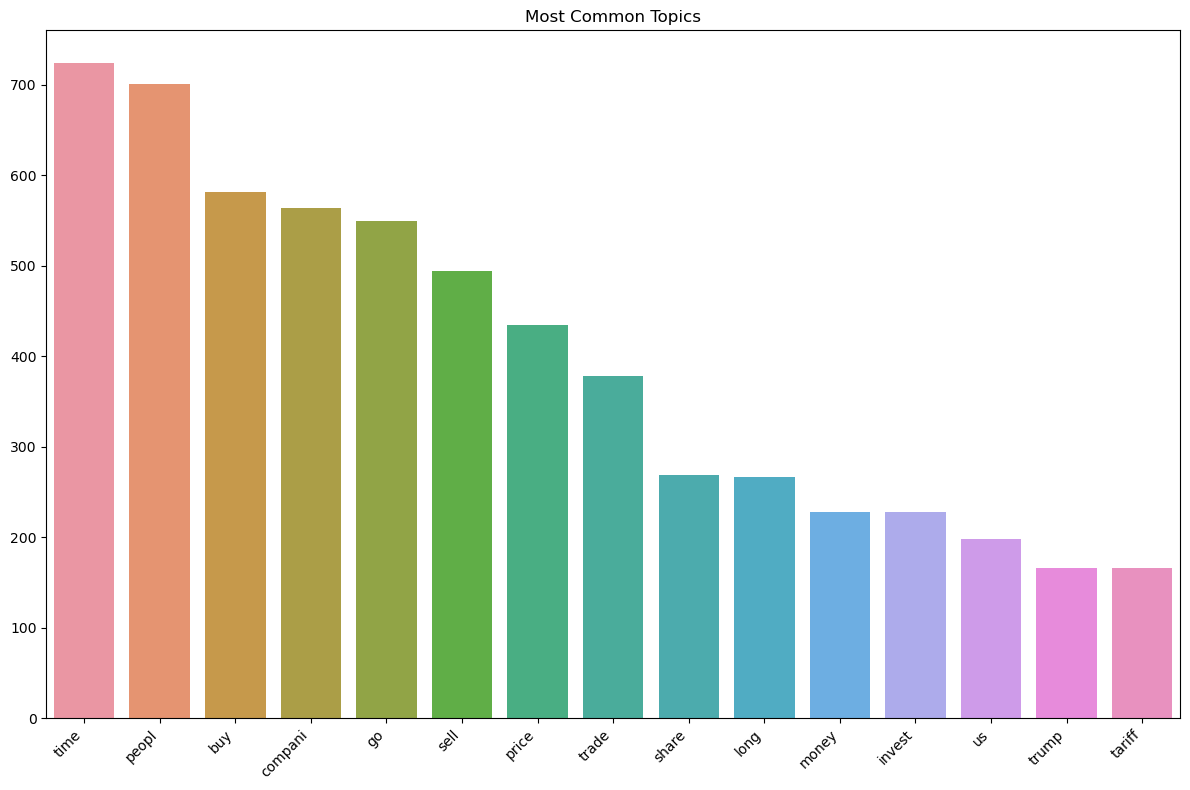

In [33]:
# 1. Most common topics
topic_counts = Counter([topic for topics_list in submission_topics.values() for topic in topics_list])
top_topics = topic_counts.most_common(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=[topic for topic, _ in top_topics], y=[count for _, count in top_topics])
plt.title('Most Common Topics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_topics.png')

### Display Most Common Topics Sentiment Distributions

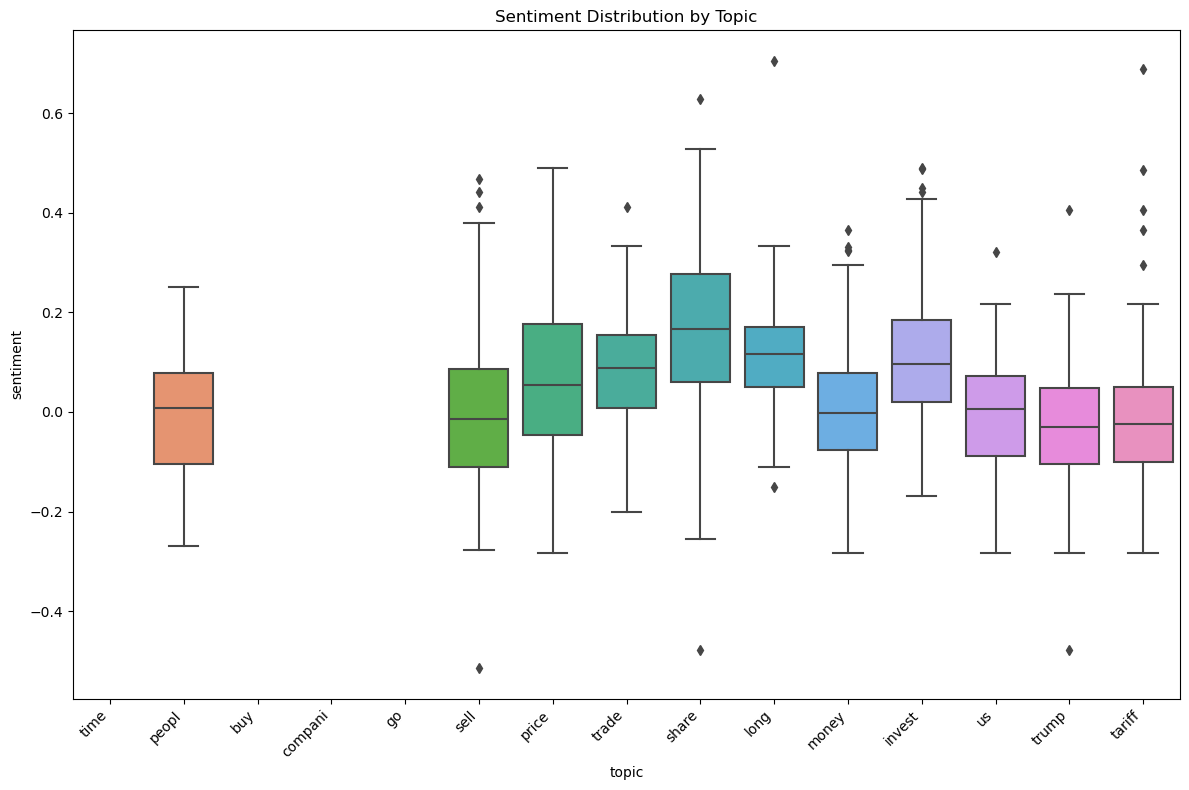

In [34]:
# 2. Sentiment distribution by top topics
top_topic_names = [topic for topic, _ in top_topics[:15]]
topic_sentiments = df[df['topic'].isin(top_topic_names)]
# Get topics in order of frequency
ordered_topics = [topic for topic, _ in top_topics[:15]]

# Use this order in the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='topic', y='sentiment', data=topic_sentiments, order=ordered_topics)
plt.title('Sentiment Distribution by Topic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('topic_sentiments.png')

### Sentiment for the Most Common Stocks Posted About

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# File paths
stock_mentions_file = f'../datasets/{subreddit_name}-stock-mentions.json'
submissions_metadata_file = '../datasets/stocks-submissions-tf-idf.json'

# Load stock mentions data
with open(stock_mentions_file, 'r', encoding='utf-8') as f:
    stock_data = json.load(f)
    stock_mentions = stock_data['stock_mentions']
    mention_counts = stock_data['mention_counts']

# Get top 25 most mentioned stocks/indices (increased from 15)
top_stocks = sorted(mention_counts.items(), key=lambda x: x[1], reverse=True)[:25]
top_stock_symbols = [symbol for symbol, count in top_stocks]

print(f"Analyzing sentiment for top 25 market symbols: {', '.join(top_stock_symbols)}")

# Load submissions metadata with sentiment data
with open(submissions_metadata_file, 'r', encoding='utf-8') as f:
    submissions_metadata = json.load(f)

# Create a dictionary to store sentiment data for each stock
stock_sentiment_data = defaultdict(list)

# Process each submission ID to extract sentiment values
for submission_id, metadata in submissions_metadata.items():
    # Get sentiment value
    sentiment = metadata.get('sentiment')
    
    # If sentiment value is available
    if sentiment is not None:
        # Check which of our top stocks are mentioned in this submission
        for stock in top_stock_symbols:
            if submission_id in stock_mentions.get(stock, []):
                stock_sentiment_data[stock].append(float(sentiment))

# Convert to DataFrame for easier plotting
sentiment_data = []
for stock, sentiments in stock_sentiment_data.items():
    for sentiment in sentiments:
        sentiment_data.append({
            'symbol': stock,
            'sentiment': sentiment,
            'mention_count': mention_counts[stock]
        })

df = pd.DataFrame(sentiment_data)

# Check if we have enough data
if df.empty:
    print("No sentiment data found for the top market symbols.")
else:
    # Order stocks by mention count
    ordered_stocks = [symbol for symbol, _ in top_stocks]
    
    # Count number of sentiment values we have for each stock
    sentiment_counts = df['symbol'].value_counts().reindex(ordered_stocks, fill_value=0)
    print("\nNumber of sentiment values found for each market symbol:")
    for stock, count in sentiment_counts.items():
        print(f"{stock}: {count}")
    
    # Only include stocks that have sentiment data
    stocks_with_data = [stock for stock in ordered_stocks if stock in df['symbol'].unique()]
    
    if stocks_with_data:
        # Calculate positive and negative sentiment counts for each symbol
        sentiment_summary = []
        for symbol in stocks_with_data:
            symbol_data = df[df['symbol'] == symbol]
            positive_count = len(symbol_data[symbol_data['sentiment'] > 0])
            negative_count = len(symbol_data[symbol_data['sentiment'] < 0])
            neutral_count = len(symbol_data[symbol_data['sentiment'] == 0])
            
            sentiment_summary.append({
                'symbol': symbol,
                'positive': positive_count,
                'negative': negative_count,
                'neutral': neutral_count,
                'total': len(symbol_data),
                'pos_pct': positive_count / len(symbol_data) * 100 if len(symbol_data) > 0 else 0,
                'neg_pct': negative_count / len(symbol_data) * 100 if len(symbol_data) > 0 else 0,
                'neu_pct': neutral_count / len(symbol_data) * 100 if len(symbol_data) > 0 else 0
            })
        
        summary_df = pd.DataFrame(sentiment_summary)
        
        # Create grouped bar chart
        plt.figure(figsize=(16, 10))
        
        # Sort by total mentions for better visualization
        summary_df['mentions'] = summary_df['symbol'].map(mention_counts)
        summary_df = summary_df.sort_values('mentions', ascending=False)
        
        # Set up the bar positions
        bar_width = 0.35
        x = np.arange(len(summary_df))
        
        # Create the grouped bars
        ax = plt.subplot(111)
        pos_bars = ax.bar(x - bar_width/2, summary_df['positive'], bar_width, 
                         color='green', alpha=0.7, label='Positive')
        neg_bars = ax.bar(x + bar_width/2, summary_df['negative'], bar_width, 
                         color='red', alpha=0.7, label='Negative')
        
        # Add count labels above bars
        for bar in pos_bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                        f'{int(height)}', ha='center', va='bottom', 
                        fontsize=9, fontweight='bold')
        
        for bar in neg_bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                        f'{int(height)}', ha='center', va='bottom',
                        fontsize=9, fontweight='bold')
        
        # Add labels, title and legend
        plt.title('Positive vs Negative Sentiment Counts for Top 25 Market Symbols', fontsize=16)
        plt.xlabel('Market Symbol', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(x, summary_df['symbol'], rotation=45, ha='right', fontsize=11)
        plt.legend(fontsize=12)
        
        # Add total mention counts below each symbol
        for i, (_, row) in enumerate(summary_df.iterrows()):
            plt.text(i, -5, f'n={row["mentions"]}', ha='center', fontsize=9)
        
        # Add some space at the bottom for the mention counts
        plt.ylim(bottom=-10)
        
        # Add grid lines for easier reading
        plt.grid(axis='y', linestyle='--', alpha=0.3)
        
        # Tight layout to avoid clipping labels
        plt.tight_layout()
        
        # Save the figure
        plt.savefig('market_symbol_pos_neg_sentiment_counts.png', dpi=300)
        plt.show()
        
        # Create a table with the data for reference
        print("\nPositive vs Negative Sentiment Counts by Market Symbol:")
        display_df = summary_df[['symbol', 'positive', 'negative', 'total', 'pos_pct', 'neg_pct', 'mentions']]
        display_df = display_df.rename(columns={
            'symbol': 'Symbol',
            'positive': 'Positive', 
            'negative': 'Negative',
            'total': 'Total Sentiments',
            'pos_pct': 'Positive %',
            'neg_pct': 'Negative %',
            'mentions': 'Total Mentions'
        })
        print(display_df.to_string(index=False, float_format=lambda x: f'{x:.1f}'))
        
        # Save the data to CSV
        display_df.to_csv('market_symbol_sentiment_counts.csv', index=False)
        print("\nData saved to market_symbol_sentiment_counts.csv")
    else:
        print("No market symbols with sentiment data found in the top 25.")

### Most Common Topics Highest and Lowest Rated Submissions

In [ ]:
#  3. Print min and max sentiment submission IDs for top 5 topics
print("\n--- Min/Max Sentiment Submission IDs for Top 5 Topics ---")
for topic, count in top_topics[:5]:
    print(f"\nTopic: {topic} (Count: {count})")
    
    # Get relevant submissions and their sentiment scores
    topic_submissions = []
    for sub_id in topic_analysis[topic]['submissions']:
        sentiment = submission_metadata[sub_id]['sentiment']
        date = submission_metadata[sub_id]['date']
        topic_submissions.append((sub_id, sentiment, date))
    
    # Skip if no submissions with valid sentiment scores
    if not topic_submissions:
        print("  No submissions with sentiment scores found")
        continue
    
    # Find min and max sentiment submissions
    min_submission = min(topic_submissions, key=lambda x: x[1])
    max_submission = max(topic_submissions, key=lambda x: x[1])
    
    # Print min sentiment submission
    print(f"  Minimum Sentiment:")
    print(f"    Submission ID: {min_submission[0]}")
    print(f"    Sentiment Score: {min_submission[1]:.4f}")
    print(f"    Date: {min_submission[2]}")
    
    # Print max sentiment submission
    print(f"  Maximum Sentiment:")
    print(f"    Submission ID: {max_submission[0]}")
    print(f"    Sentiment Score: {max_submission[1]:.4f}")
    print(f"    Date: {max_submission[2]}")
    
    # Create sentiment trend graph
    topic_df = df[df['topic'] == topic].sort_values('timestamp')
    topic_df['datetime'] = pd.to_datetime(topic_df['timestamp'], unit='s')

### Display Word Clouds 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Initialize an empty dictionary for word cloud
top_topics = topic_counts.most_common(150)
wordcloud_topics = {}

# Your topic data using frequency for size and sentiment for color
for topic, count in top_topics:
    # Use the count (frequency) as the value for sizing
    wordcloud_topics[topic] = count  # This will make size based on frequency

# Get sentiment values for coloring
sentiment_dict = {topic: topic_analysis[topic]['avg_sentiment'] for topic, _ in top_topics}
min_sentiment = min(sentiment_dict.values())
max_sentiment = max(sentiment_dict.values())

# Color function based on sentiment - red to yellow to green
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    sentiment = sentiment_dict.get(word, 0)
    # Normalize sentiment to [0,1]
    normalized = (sentiment - min_sentiment) / (max_sentiment - min_sentiment) if max_sentiment > min_sentiment else 0.5
    
    # Convert to a color (red to yellow to green)
    if normalized < 0.5:
        # Red to yellow (bad to neutral)
        # Increase green component as we move toward middle
        return f"rgb(255, {int(255 * normalized * 2)}, 0)"
    else:
        # Yellow to green (neutral to good)
        # Decrease red component as we move toward good
        return f"rgb({int(255 * (1 - (normalized - 0.5) * 2))}, 255, 0)"

# Create a WordCloud object
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    color_func=color_func,  # Custom color function based on sentiment
    prefer_horizontal=0.9,  # Allow some vertical words for better packing
    max_words=100,
    relative_scaling=0.6,  # Balance frequency vs. ranking
    min_font_size=8,
    max_font_size=80,
    random_state=42  # Fixed seed for reproducibility
).generate_from_frequencies(wordcloud_topics)

# Create a figure for the word cloud
plt.figure(figsize=(12, 8), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Add a title and explain the color scheme
plt.title("Topic Frequency with Sentiment Color", fontsize=16, pad=20)

# Add a small color legend
ax = plt.gca()
ax.text(0.01, 0.01, "Red = Negative Sentiment", transform=ax.transAxes, 
        fontsize=10, color='darkred', ha='left')
ax.text(0.5, 0.01, "Yellow = Neutral Sentiment", transform=ax.transAxes, 
        fontsize=10, color='goldenrod', ha='center')
ax.text(0.99, 0.01, "Green = Positive Sentiment", transform=ax.transAxes, 
        fontsize=10, color='darkgreen', ha='right')

# Save the generated image as a PNG file
wordcloud.to_file("topic_frequency_wordcloud.png")
print("Word cloud saved as 'topic_frequency_wordcloud.png'")

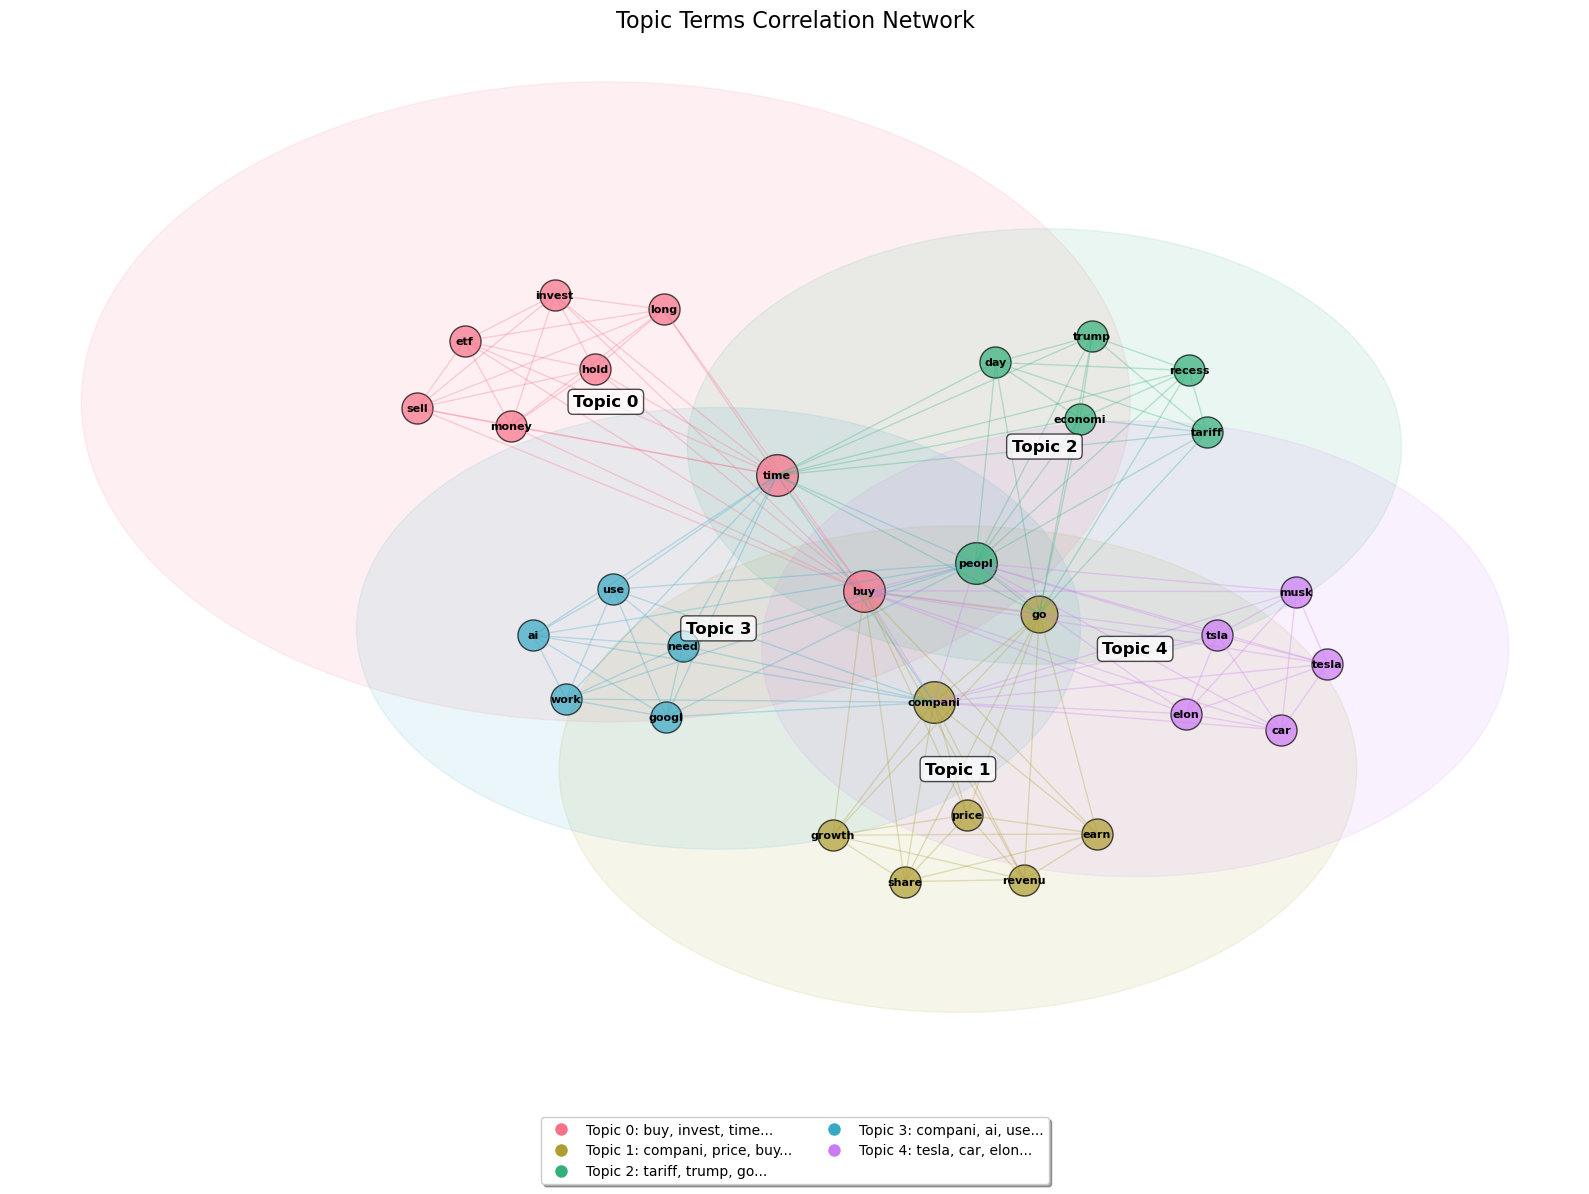

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns

def create_topic_visualization(top_terms_by_topic):
    """
    Create a more clear and visually appealing topic visualization
    
    :param top_terms_by_topic: Dictionary of topics and their terms
    """
    plt.figure(figsize=(16, 12))
    
    # Create a graph
    G = nx.Graph()
    
    # Color palette - dynamically sized
    colors = sns.color_palette("husl", len(top_terms_by_topic))
    
    # Prepare for layout
    for topic_idx, terms in top_terms_by_topic.items():
        # Create a complete subgraph for each topic
        for i, term1 in enumerate(terms):
            for term2 in terms[i+1:]:
                G.add_edge(term1, term2, topic=topic_idx)
    
    # Use spring layout for node positioning
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Draw topic areas
    for idx, (topic_idx, terms) in enumerate(top_terms_by_topic.items()):
        # Get positions of terms in this topic
        topic_pos = {term: pos[term] for term in terms if term in pos}
        
        if topic_pos:
            # Calculate the center and radius of the topic area
            centers = np.array(list(topic_pos.values()))
            center = centers.mean(axis=0)
            radius = np.max(np.linalg.norm(centers - center, axis=1)) * 1.3
            
            # Draw topic area
            circle = plt.Circle(center, radius, color=colors[idx], alpha=0.1)
            plt.gca().add_patch(circle)
            
            # Add topic label
            plt.text(center[0], center[1], f"Topic {topic_idx}", 
                     fontsize=12, fontweight='bold', 
                     ha='center', va='center',
                     bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))
    
    # Draw edges
    for (u, v, data) in G.edges(data=True):
        topic_idx = data['topic']
        color_idx = list(top_terms_by_topic.keys()).index(topic_idx)
        plt.plot([pos[u][0], pos[v][0]], 
                 [pos[u][1], pos[v][1]], 
                 color=colors[color_idx], 
                 alpha=0.3, 
                 linewidth=1)
    
    # Node sizes based on frequency
    term_counts = {}
    for terms in top_terms_by_topic.values():
        for term in terms:
            term_counts[term] = term_counts.get(term, 0) + 1
    
    # Draw nodes
    for term, (x, y) in pos.items():
        # Find the topic for this term
        topic_idx = None
        for idx, terms in top_terms_by_topic.items():
            if term in terms:
                topic_idx = idx
                break
        
        # Ensure we found a topic
        if topic_idx is not None:
            # Node size based on term frequency
            node_size = 300 + 200 * term_counts.get(term, 1)
            
            # Color index
            color_idx = list(top_terms_by_topic.keys()).index(topic_idx)
            
            # Plot node
            plt.scatter(x, y, 
                        s=node_size, 
                        color=colors[color_idx], 
                        alpha=0.7, 
                        edgecolors='black', 
                        linewidth=1)
            
            # Add term label
            plt.text(x, y, term, 
                     fontsize=8, 
                     ha='center', 
                     va='center', 
                     fontweight='bold')
    
    # Styling
    plt.title('Topic Terms Correlation Network', fontsize=16)
    plt.axis('off')
    
    # Create custom legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', 
                   label=f'Topic {topic_idx}: {", ".join(terms[:3])}...', 
                   markerfacecolor=colors[list(top_terms_by_topic.keys()).index(topic_idx)], 
                   markersize=10)
        for topic_idx, terms in top_terms_by_topic.items()
    ]
    plt.legend(handles=legend_elements, 
               loc='upper center', 
               bbox_to_anchor=(0.5, -0.05),
               fancybox=True, 
               shadow=True, 
               ncol=2)
    
    plt.tight_layout()
    plt.show()

# Example usage
top_terms_by_topic = {
    0: ["buy", "invest", "time", "money", "sell", "long", "hold", "etf"],
    1: ["compani", "price", "buy", "share", "earn", "growth", "revenu", "go"],
    2: ["tariff", "trump", "go", "economi", "peopl", "time", "recess", "day"],
    3: ["compani", "ai", "use", "googl", "peopl", "time", "work", "need"],
    4: ["tesla", "car", "elon", "musk", "compani", "tsla", "buy", "peopl"]
}

# Call the function
create_topic_visualization(top_terms_by_topic)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def create_dataframe_from_metadata(submission_metadata):
    """
    Convert submission_metadata dictionary to a DataFrame
    
    :param submission_metadata: Dictionary containing submission metadata
    :return: Pandas DataFrame
    """
    rows = []
    for submission_id, metadata in submission_metadata.items():
        # Ensure topics is a list
        topics = metadata.get('topics', [])
        if not isinstance(topics, list):
            topics = [topics]
        
        for topic in topics:
            # Ensure topic is a string and convert to lowercase
            topic = str(topic).lower().strip()
            
            # Skip empty topics
            if not topic:
                continue
            
            rows.append({
                'submission_id': submission_id,
                'date': pd.to_datetime(metadata['timestamp'], unit='s'),
                'timestamp': pd.to_datetime(metadata['timestamp'], unit='s'),
                'sentiment': metadata['sentiment'],
                'num_comments': metadata['num_comments'],
                'topic': topic
            })
    
    return pd.DataFrame(rows)

def analyze_topics_sentiment(df, topics=None):
    """
    Analyze sentiment for topics with comprehensive printing
    
    :param df: DataFrame with submission data
    :param topics: List of topics to analyze (optional)
    """
    # If no topics specified, use all unique topics
    if topics is None:
        topics = df['topic'].unique().tolist()
    else:
        # Ensure topics are lowercase and stripped
        topics = [str(topic).lower().strip() for topic in topics]
    
    # Filter for specified topics
    filtered_df = df[df['topic'].isin(topics)]
    
    # Print overall data insights
    print("Data Analysis Overview:")
    print("-" * 30)
    print(f"Total number of submissions: {len(df)}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Total days in dataset: {(df['date'].max() - df['date'].min()).days + 1} days")
    print("\nTopic Distribution:")
    topic_counts = filtered_df['topic'].value_counts()
    print(topic_counts)
    
    print("\nSentiment Statistics by Topic:")
    topic_sentiment_stats = filtered_df.groupby('topic')['sentiment'].agg([
        'count', 
        'mean', 
        'median', 
        'min', 
        'max', 
        'std'
    ])
    print(topic_sentiment_stats)
    
    # Plotting
    plt.figure(figsize=(15, 8))
    
    # Group by date and topic, calculate daily average sentiment
    daily_sentiment = filtered_df.groupby([
        pd.Grouper(key='date', freq='D'), 
        'topic'
    ])['sentiment'].mean().reset_index()
    
    # Pivot for plotting
    pivot_df = daily_sentiment.pivot(index='date', columns='topic', values='sentiment')
    
    # Plot each topic
    for topic in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[topic], label=topic, marker='o')
    
    plt.title('Daily Average Sentiment by Topic', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Sentiment Score', fontsize=12)
    plt.legend(title='Topics')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save plot
    plt.savefig('topic_sentiment_analysis.png')
    plt.close()
    
    return filtered_df

# Debugging function to print out all unique topics
def print_all_topics(submission_metadata):
    """
    Print all unique topics in the submission metadata
    """
    all_topics = set()
    for metadata in submission_metadata.values():
        topics = metadata.get('topics', [])
        if not isinstance(topics, list):
            topics = [topics]
        all_topics.update(str(topic).lower().strip() for topic in topics if topic)
    
    print("All unique topics:")
    print(sorted(all_topics))

# Example usage
df = create_dataframe_from_metadata(submission_metadata)
print_all_topics(submission_metadata)  # Use this to see all available topics
result = analyze_topics_sentiment(df, topics=['trump', 'sell', 'tariff'])

All unique topics:
['000', '10', 'abl', 'absolut', 'account', 'action', 'actual', 'ad', 'add', 'administr', 'advic', 'affect', 'ago', 'agre', 'ai', 'allow', 'almost', 'alreadi', 'alway', 'amazon', 'america', 'american', 'amount', 'analyst', 'announc', 'anoth', 'answer', 'anyon', 'anyth', 'appl', 'april', 'around', 'ask', 'asset', 'assum', 'automat', 'averag', 'away', 'bad', 'bank', 'base', 'basic', 'bear', 'beat', 'becom', 'begin', 'believ', 'benefit', 'best', 'bet', 'better', 'big', 'billion', 'bit', 'bond', 'book', 'bot', 'bottom', 'bought', 'brand', 'bring', 'build', 'bullish', 'busi', 'call', 'can', 'canada', 'cant', 'cap', 'capit', 'car', 'care', 'case', 'cash', 'caus', 'ceo', 'certain', 'chang', 'chart', 'cheap', 'check', 'china', 'chines', 'close', 'come', 'comment', 'compar', 'competit', 'complet', 'concern', 'confid', 'consid', 'consum', 'continu', 'contract', 'correct', 'cost', 'countri', 'coupl', 'cours', 'crash', 'crazi', 'creat', 'current', 'custom', 'cut', 'daili', 'data'